In [1]:
from os import listdir
from os.path import join
import numpy as np
from tslearn.metrics import dtw, dtw_path
import sys
import ot
sys.path.append('../src/OPW')
from opw import opw_sinkhorn
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append('../src/GOW')
from GOW import GOW_sinkhorn_autoscale
import joblib

In [2]:
def warping_path_to_warping_matrix(warping_path, len_seq1, len_seq2):
    warping_matrix = np.zeros((len_seq1, len_seq2))
    
    for (i, j) in warping_path:
        warping_matrix[i][j] = 1

    return warping_matrix

In [3]:
data = joblib.load('../Datasets/MSRDailyActivity3D/3D_coordinates/data.pkl')
labels = joblib.load('../Datasets/MSRDailyActivity3D/3D_coordinates/labels.pkl')
filenames = joblib.load('../Datasets/MSRDailyActivity3D/3D_coordinates/filenames.pkl')

In [4]:
# Action 1
action = 15
subject = 8
instance = 2
filename = 'a%02i_s%02i_e%02i_skeleton'%(action, subject, instance)
seq_index = filenames.index(filename)
seq1 = data[seq_index]

# Action 2
action = 16
subject = 8
instance = 2
filename = 'a%02i_s%02i_e%02i_skeleton'%(action, subject, instance)
seq_index = filenames.index(filename)
seq2 = data[seq_index]

# DTW

<Axes: >

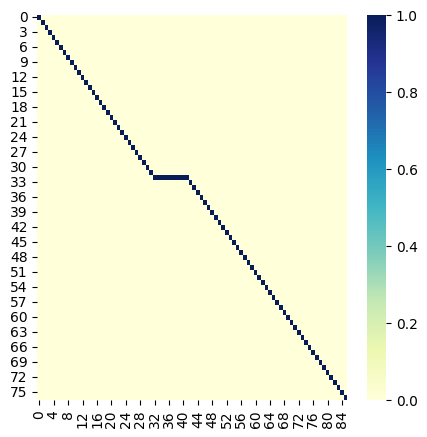

In [5]:
warping_path, similarity_score = dtw_path(seq1, seq2)
warping_matrix = warping_path_to_warping_matrix(warping_path, len(seq1), len(seq2))

plt.figure(figsize=(5,5))
sns.heatmap(warping_matrix, cmap="YlGnBu", annot=None)

In [6]:
warping_path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (32, 33),
 (32, 34),
 (32, 35),
 (32, 36),
 (32, 37),
 (32, 38),
 (32, 39),
 (32, 40),
 (32, 41),
 (33, 42),
 (34, 43),
 (35, 44),
 (36, 45),
 (37, 46),
 (38, 47),
 (39, 48),
 (40, 49),
 (41, 50),
 (42, 51),
 (43, 52),
 (44, 53),
 (45, 54),
 (46, 55),
 (47, 56),
 (48, 57),
 (49, 58),
 (50, 59),
 (51, 60),
 (52, 61),
 (53, 62),
 (54, 63),
 (55, 64),
 (56, 65),
 (57, 66),
 (58, 67),
 (59, 68),
 (60, 69),
 (61, 70),
 (62, 71),
 (63, 72),
 (64, 73),
 (65, 74),
 (66, 75),
 (67, 76),
 (68, 77),
 (69, 78),
 (70, 79),
 (71, 80),
 (72, 81),
 (73, 82),
 (74, 83),
 (75, 84),
 (76, 85)]

# OPW

G:\CNTT\Python310\lib\site-packages\ot\bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


<Axes: >

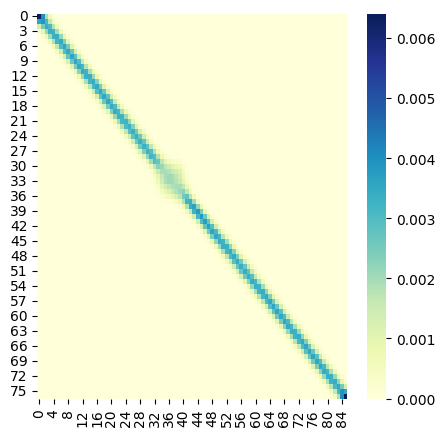

In [18]:
C = ot.dist(seq1, seq2, metric='minkowski')
a = np.ones(len(seq1)) / len(seq1)
b = np.ones(len(seq2)) / len(seq2)
LAMBDA1 = 5
LAMBDA2 = 0.05
P = opw_sinkhorn(a, b, C, lambda1=LAMBDA1, lambda2=LAMBDA2)
plt.figure(figsize=(5,5))
sns.heatmap(P, cmap="YlGnBu", annot=None)

<Axes: >

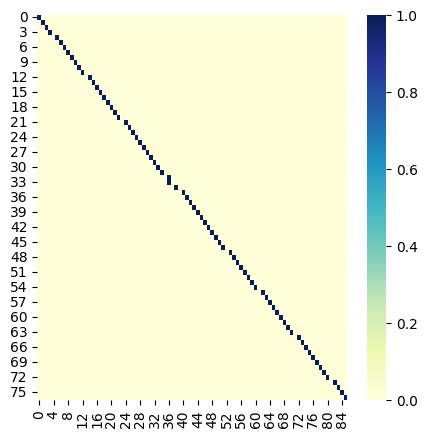

In [19]:
warping_path = []

for i in range(len(seq1)):
    warping_path.append((i, np.argmax(P[i])))

warping_matrix = warping_path_to_warping_matrix(warping_path, len(seq1), len(seq2))

plt.figure(figsize=(5,5))
sns.heatmap(warping_matrix, cmap="YlGnBu", annot=None)

In [9]:
warping_path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 15),
 (14, 16),
 (15, 17),
 (16, 18),
 (17, 19),
 (18, 20),
 (19, 21),
 (20, 22),
 (21, 24),
 (22, 25),
 (23, 26),
 (24, 27),
 (25, 28),
 (26, 29),
 (27, 30),
 (28, 31),
 (29, 32),
 (30, 34),
 (31, 35),
 (32, 36),
 (33, 37),
 (34, 38),
 (35, 39),
 (36, 40),
 (37, 41),
 (38, 43),
 (39, 44),
 (40, 45),
 (41, 46),
 (42, 47),
 (43, 48),
 (44, 49),
 (45, 50),
 (46, 51),
 (47, 53),
 (48, 54),
 (49, 55),
 (50, 56),
 (51, 57),
 (52, 58),
 (53, 59),
 (54, 60),
 (55, 62),
 (56, 63),
 (57, 64),
 (58, 65),
 (59, 66),
 (60, 67),
 (61, 68),
 (62, 69),
 (63, 70),
 (64, 72),
 (65, 73),
 (66, 74),
 (67, 75),
 (68, 76),
 (69, 77),
 (70, 78),
 (71, 79),
 (72, 80),
 (73, 82),
 (74, 83),
 (75, 84),
 (76, 85)]

# GOW

G:\CNTT\Python310\lib\site-packages\ot\bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


Iterations: 20


<Axes: >

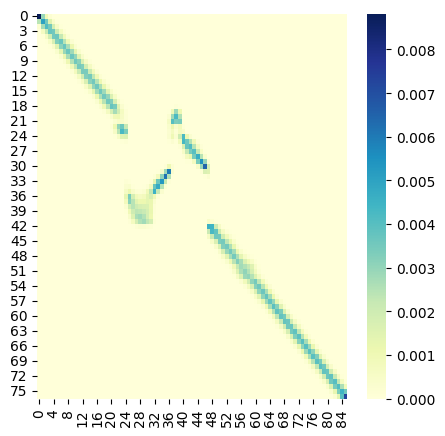

In [41]:
LAMBDA1 = 20
LAMBDA2 = 100

C = ot.dist(seq1, seq2, metric='minkowski')
a = np.ones(len(seq1)) / len(seq1)
b = np.ones(len(seq2)) / len(seq2)

C_new, P, w = GOW_sinkhorn_autoscale(a, b, C, LAMBDA1=LAMBDA1, LAMBDA2=LAMBDA2, maxIter=20, num_FW_iteration=1000, epsilon=0.0001)

plt.figure(figsize=(5,5))
sns.heatmap(P, cmap="YlGnBu", annot=None)

<Axes: >

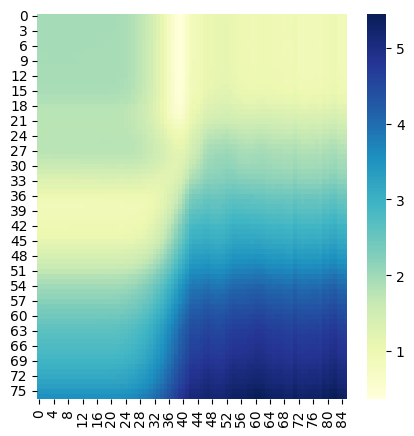

In [46]:
plt.figure(figsize=(5,5))
sns.heatmap(C, cmap="YlGnBu", annot=None)

<Axes: >

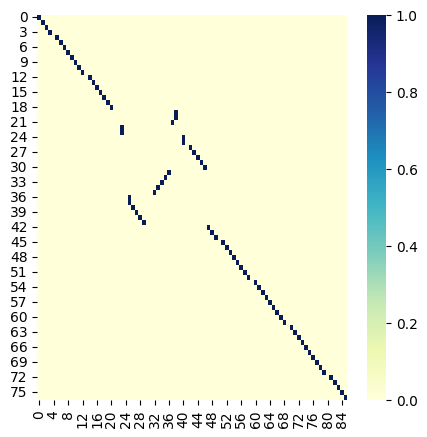

In [42]:
warping_path = []

for i in range(len(seq1)):
    warping_path.append((i, np.argmax(P[i])))

warping_matrix = warping_path_to_warping_matrix(warping_path, len(seq1), len(seq2))

plt.figure(figsize=(5,5))
sns.heatmap(warping_matrix, cmap="YlGnBu", annot=None)

In [40]:
warping_path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 15),
 (14, 16),
 (15, 17),
 (16, 18),
 (17, 19),
 (18, 20),
 (19, 38),
 (20, 38),
 (21, 38),
 (22, 23),
 (23, 23),
 (24, 40),
 (25, 40),
 (26, 42),
 (27, 43),
 (28, 44),
 (29, 45),
 (30, 46),
 (31, 36),
 (32, 35),
 (33, 34),
 (34, 33),
 (35, 32),
 (36, 25),
 (37, 25),
 (38, 26),
 (39, 27),
 (40, 28),
 (41, 29),
 (42, 47),
 (43, 48),
 (44, 49),
 (45, 50),
 (46, 51),
 (47, 52),
 (48, 54),
 (49, 55),
 (50, 56),
 (51, 57),
 (52, 57),
 (53, 59),
 (54, 61),
 (55, 62),
 (56, 63),
 (57, 64),
 (58, 65),
 (59, 66),
 (60, 67),
 (61, 68),
 (62, 69),
 (63, 70),
 (64, 72),
 (65, 73),
 (66, 74),
 (67, 75),
 (68, 76),
 (69, 77),
 (70, 78),
 (71, 79),
 (72, 80),
 (73, 82),
 (74, 83),
 (75, 85),
 (76, 85)]